In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch
import torchvision 
from PIL import Image 
import cv2  

cipher_species = ['Bombus californicus', 'Bombus melanopygus', 'Bombus sonorus']

#place folder original inside this folder and rename it data
file_path = os.path.join(os.getcwd(), 'data')


class CCBER_BEES(torch.utils.data.Dataset):
    def __init__(self, data_path, transform = None):
        images = []
        for species_name in os.listdir(data_path):
            if species_name not in cipher_species:
                continue
            species_path = os.path.join(file_path, species_name)
            for image_name in os.listdir(species_path):
                if image_name.endswith(".JPG"):   
                    image_path = os.path.join(species_path,image_name)   
                    images.append(image_path)
        self.images = images
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image_file = self.images[index]
        image = Image.open(image_file).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image
    
data = CCBER_BEES(file_path)

len(data)

13

(1000, 1000, 3)

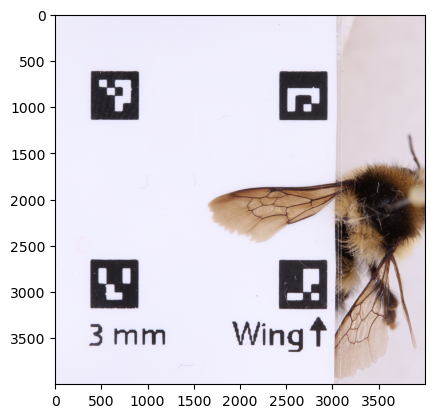

In [2]:
rand = data.images[np.random.randint(0, len(data))]
image = cv2.imread(rand)

plt.imshow(image[:,:,::-1])

image = cv2.pyrDown(image)
image = cv2.pyrDown(image)
image.shape
#image = cv2.pyrDown(image)

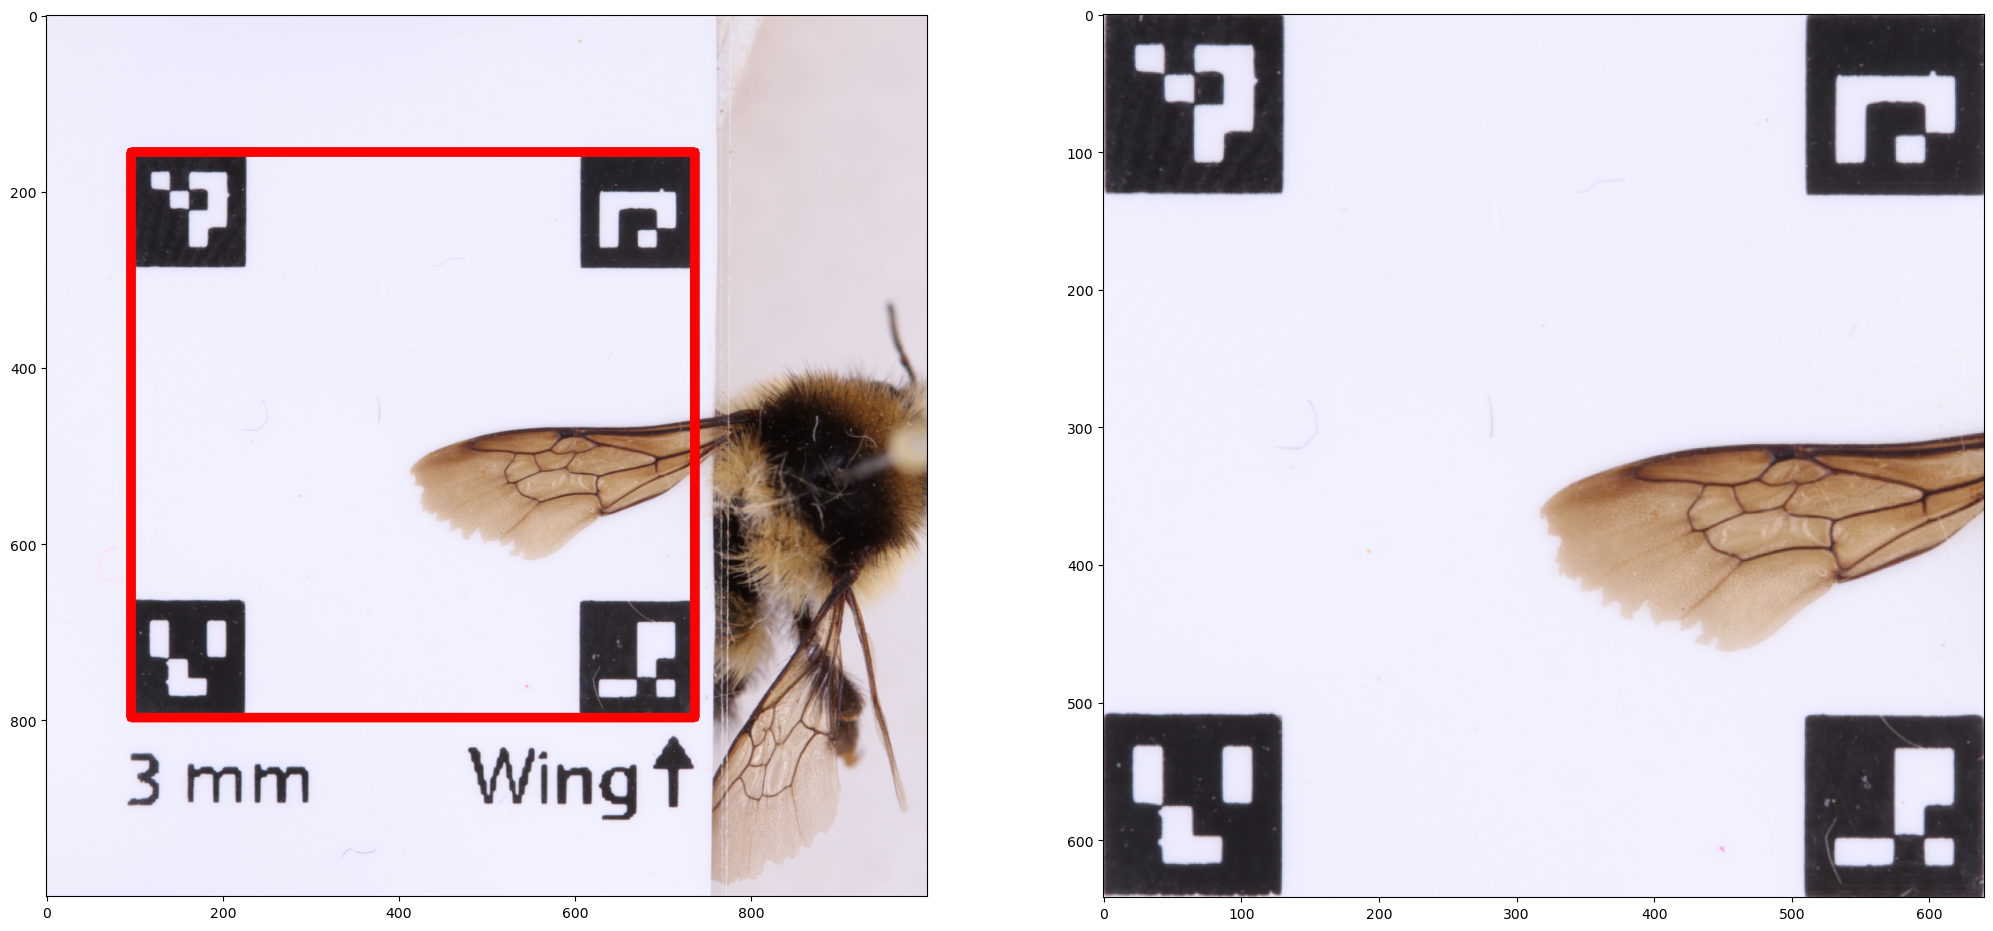

In [3]:
from cipher_image import printArucoDict, showMarkers, crop_image



arucoDict= cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
corners, ids, rejected = cv2.aruco.detectMarkers(
	image, arucoDict, parameters=cv2.aruco.DetectorParameters())

crop = crop_image(image, show=True)



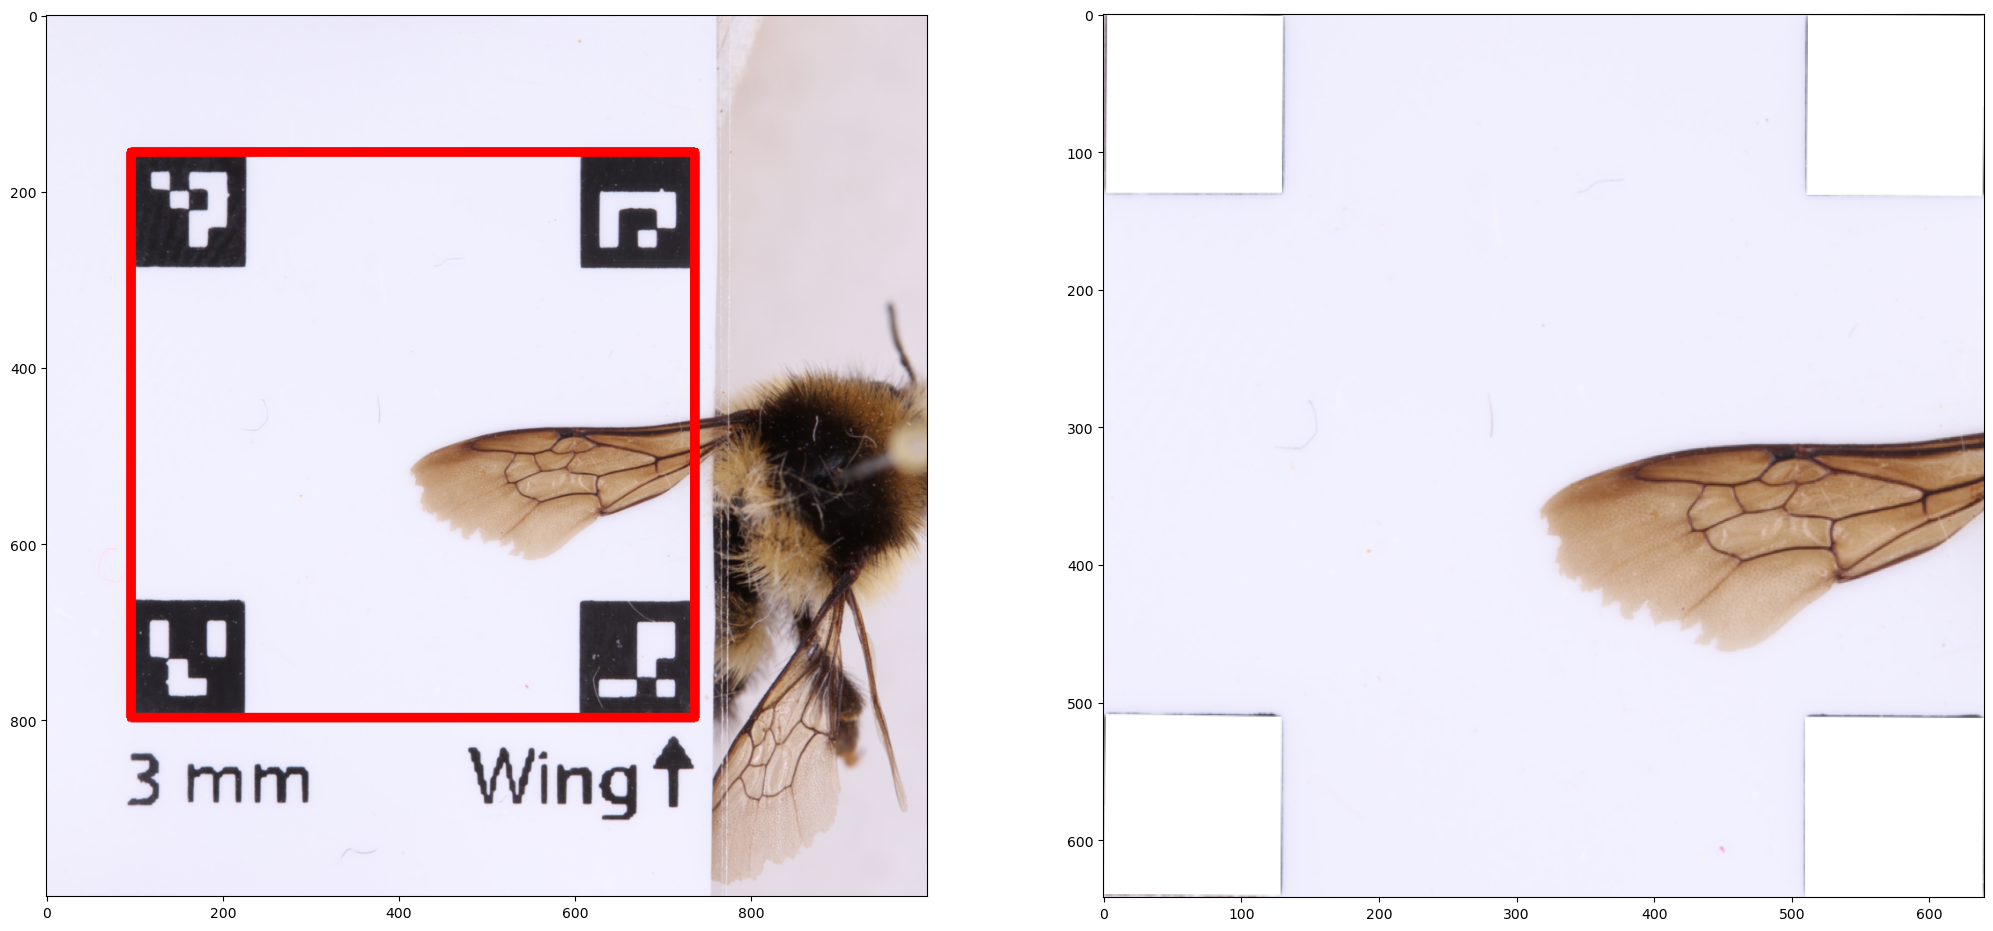

In [4]:
a = crop_image(image, remove_markers=True, show=True)